In [1]:
# Machine Learning and Data Preprocessing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('default')
import random
import math as math
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Sleep_Efficiency.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [4]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
df.shape

(452, 15)

0     -1.693157
1     -0.537977
2      0.617204
3     -1.693157
4      0.617204
         ...   
447    0.039613
448   -1.693157
449    1.194794
450   -0.537977
451    0.039613
Name: Sleep duration, Length: 452, dtype: float64


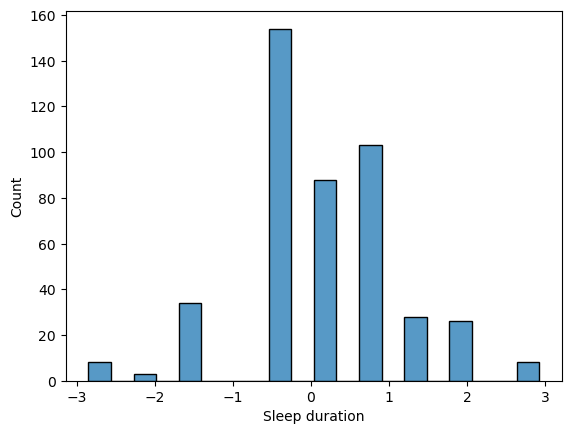

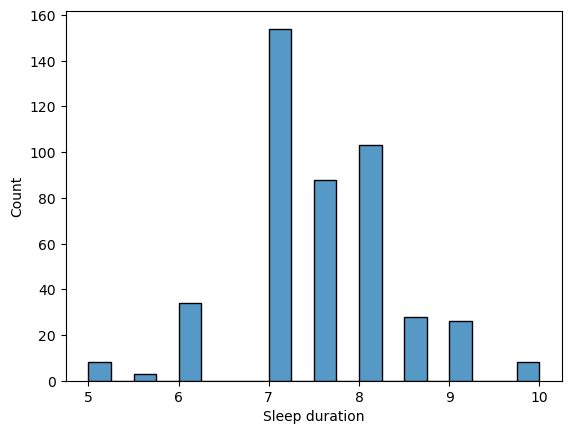

In [36]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler = scaler.fit(df['Sleep efficiency'])
mean = np.mean(df['Sleep duration'])
std = np.std(df['Sleep duration'])
s_d_norm = (df['Sleep duration'] - mean) / std
print(s_d_norm)
sns.histplot(s_d_norm)
plt.show()
sns.histplot(df['Sleep duration'])
plt.show()

In [16]:
# number of missing values for each column
print("Number of missing values:\n")
print("by column:")
nan_val_count = df.isnull().sum()
print(nan_val_count, "\n")

som = nan_val_count.sum()
print("Total:", som, end= " ~")
print(round(som / (df.shape[0] * df.shape[1]) * 100), "% of the dataset")

Number of missing values:

by column:
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64 

Total: 67 ~1 % of the dataset


In [33]:
# replace null values with mean
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [34]:
# checking for null values
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Sleep Quality             0
dtype: int64

0      1
1      0
2      1
3      0
4      0
      ..
447    1
448    0
449    0
450    0
451    0
Name: Sleep Quality, Length: 452, dtype: int32
     Caffeine consumption  Alcohol consumption  Exercise frequency
0                0.000000                  0.0                 3.0
1                0.000000                  3.0                 3.0
2                0.000000                  0.0                 3.0
3               50.000000                  5.0                 1.0
4                0.000000                  3.0                 3.0
..                    ...                  ...                 ...
447              0.000000                  0.0                 5.0
448             25.000000                  0.0                 3.0
449             23.653396                  3.0                 0.0
450              0.000000                  0.0                 3.0
451             50.000000                  1.0                 1.0

[452 rows x 3 columns]


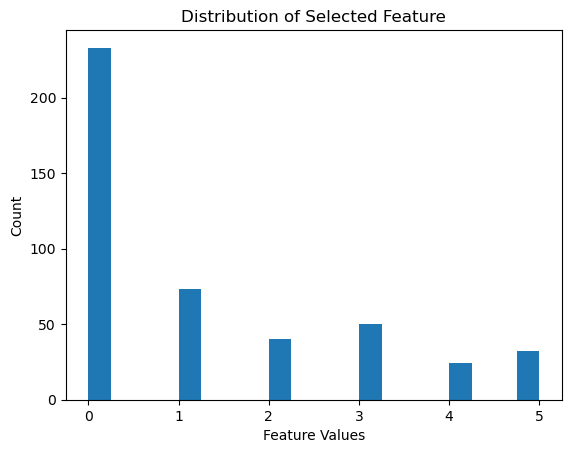

In [58]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

df["Sleep Quality"] = np.where(df["Sleep efficiency"] > 0.8, 1, 0)
print(df["Sleep Quality"])

# Sleep efficiency as a target variable
target = df['Sleep Quality']

num_cols = [ 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
X = df[num_cols]
print(X)

# SelectPercentile,mutual_info_classif,10%
selector = SelectPercentile(mutual_info_classif, percentile=10)
X_new = selector.fit_transform(X, target)

# (X_new)Draw histogram
plt.hist(X_new, bins=20)
# sns.histplot(X_new)
plt.xlabel('Feature Values')
plt.ylabel('Count')
plt.title('Distribution of Selected Feature')
plt.show()



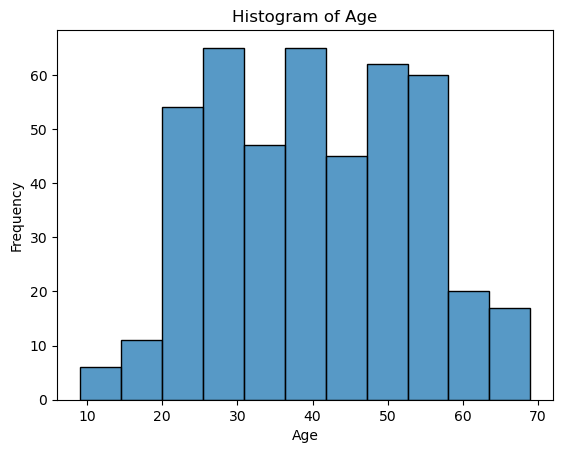

In [56]:
# plt.hist(df['Age'],bins=20)
# plt.title('Histogram of Age')
# plt.xlabel('Age')
# plt.ylabel('Frequency')

sns.histplot(df['Age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()